###**Análise de risco em conta**
O modelo apresentado irá utilizar um Dataset do Kaggle e será capaz de prever o risco de crédito.




Conjunto de dados de risco de crédito: [Kaggle](https://www.kaggle.com/datasets/uciml/german-credit/code)

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

---

### Tradução

* Idade (numérico)
* Sexo(texto: masculino, feminino)
* Emprego (numérico: 0 - não qualificado e não residente, 1 - não qualificado e residente, 2 - qualificado, 3 - altamente qualificado)
* Habitação (texto: próprio, alugado ou gratuito)
* Contas de poupança (texto - pouco, moderado, bastante rico, rico)
* Conta corrente (numérica, em DM - Deutsch Mark)
* Valor do crédito (numérico, em DM)
* Duração (numérico, em mês)
* Finalidade (texto: carro, móveis/equipamentos, rádio/TV, eletrodomésticos, reparos, educação, negócios, férias/outros)


### Preparando o ambiente para receber o Dataset


In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keziacampos","key":"***"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d uciml/german-credit

  0% 0.00/10.9k [00:00<?, ?B/s]
100% 10.9k/10.9k [00:00<00:00, 8.73MB/s]


In [ ]:
!unzip german-credit.zip

Archive:  german-credit.zip
  inflating: german_credit_data.csv  


###Importando as bibliotecas e Dataset

In [ ]:
#Importando bibliotecas:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
#Lendo o arquivo Dataset
df = pd.read_csv('german_credit_data.csv', encoding='utf8')

In [ ]:
#Visualizar
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
#Formato do Dataset
df.shape

(1000, 10)

In [ ]:
#Informações do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [ ]:
#Contagem para cada coluna
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


**Descrição acima**:

count = quantidade

mean = média

std = desvio padrão

min = o valor mínimo

25%

50% = mediana

75%

max = o valor máximo

In [ ]:
#Valores unicos na tabela
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
dtype: int64

In [ ]:
#Verificando valores nulos
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### Preparando os dados

**Unnamed** é uma coluna desnecessária para a continuação do Slide. 
A partir daqui, sua coluna será derruba e analise continuará sendo analisada com o nome do dataframe **df2**.

In [ ]:
df2 = df.copy()

In [ ]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
df2.replace(['?', 'NaN', np.nan], -1, inplace=True) 
col= ['Saving accounts', 'Checking account']
for i in col:
    df2[i] =  df2[i].astype('category')
imp = SimpleImputer(missing_values=-1, strategy='most_frequent')
df2[col] = imp.fit_transform(df2[col])

In [ ]:
#Convertendo colunas para valores categóricos 
col_categoria = ['Sex', 'Job', 'Housing','Purpose', 'Saving accounts', 'Checking account']
for i in col_categoria:
    df2[i+"_categoria"] = df2[i].astype('category').cat.codes
df2.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_categoria,Job_categoria,Housing_categoria,Purpose_categoria,Saving accounts_categoria,Checking account_categoria
0,67,male,2,own,little,little,1169,6,radio/TV,1,2,1,5,0,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,2,1,5,0,1
2,49,male,1,own,little,little,2096,12,education,1,1,1,3,0,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,2,0,4,0,0
4,53,male,2,free,little,little,4870,24,car,1,2,0,1,0,0


In [ ]:
#Correlação entre as variáveis 
df2.corr()

,Age,Job,Credit amount,Duration,Sex_categoria,Job_categoria,Housing_categoria,Purpose_categoria,Saving accounts_categoria,Checking account_categoria
Age,1.000000,0.015673,0.032716,-0.036136,0.161694,0.015673,-0.301419,-0.074084,0.015772,-0.027176
Job,0.015673,1.000000,0.285385,0.210910,0.070298,1.000000,-0.107191,-0.025326,-0.034596,-0.043277
Credit amount,0.032716,0.285385,1.000000,0.624984,0.093482,0.285385,-0.135632,-0.151720,-0.077929,0.006953
Duration,-0.036136,0.210910,0.624984,1.000000,0.081432,0.210910,-0.157049,-0.083459,-0.043274,0.004163
Sex_categoria,0.161694,0.070298,0.093482,0.081432,1.000000,0.070298,-0.219844,-0.063231,-0.014425,-0.012705
Job_categoria,0.015673,1.000000,0.285385,0.210910,0.070298,1.000000,-0.107191,-0.025326,-0.034596,-0.043277
Housing_categoria,-0.301419,-0.107191,-0.135632,-0.157049,-0.219844,-0.107191,1.000000,0.020633,0.043324,-0.028196
Purpose_categoria,-0.074084,-0.025326,-0.151720,-0.083459,-0.063231,-0.025326,0.020633,1.000000,-0.024817,0.018577
Saving accounts_categoria,0.015772,-0.034596,-0.077929,-0.043274,-0.014425,-0.034596,0.043324,-0.024817,1.000000,0.015763
Checking account_categoria,-0.027176,-0.043277,0.006953,0.004163,-0.012705,-0.043277,-0.028196,0.018577,0.015763,1.000000


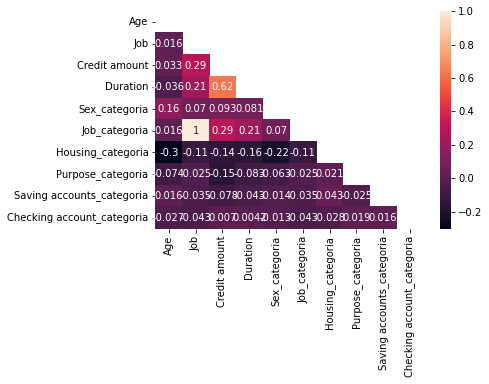

In [ ]:
# Masking to show only one side of the matrix
corr = np.corrcoef(df2.corr())                        
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Correlação com heatmap
sns.heatmap(df2.corr(), annot=True, mask=mask)
plt.show()

Baseado na correlação acima, apresentado por uma cor "quente" identifica que existe uma atividade alta entre "**duração**" e "**quantidade de crédito**".

Logo é necessário avaliar esse comportamento.

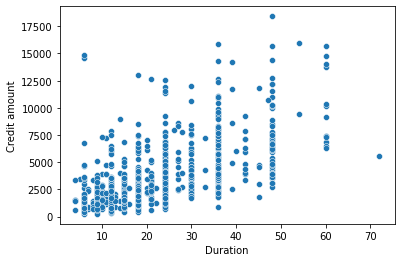

In [ ]:
sns.scatterplot(data = df2, x='Duration', y='Credit amount')
plt.show()

Em seguida, também foi observado uma correlação "quente" entre "**Trabalho**" e "**quantidade de crédito**", dessa forma também é necessário avaliar.

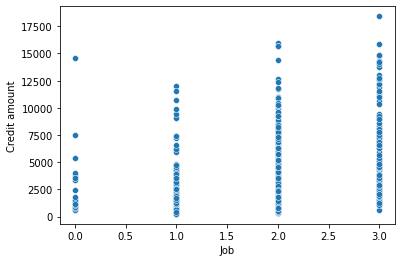

In [ ]:
sns.scatterplot(data = df2, x='Job', y='Credit amount')
plt.show()

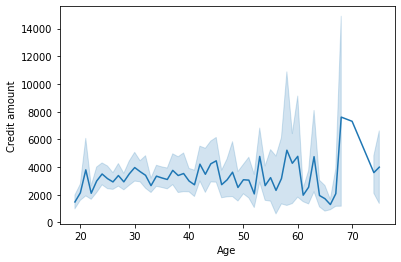

In [ ]:
sns.lineplot(data=df2, x='Age', y='Credit amount')
plt.show()

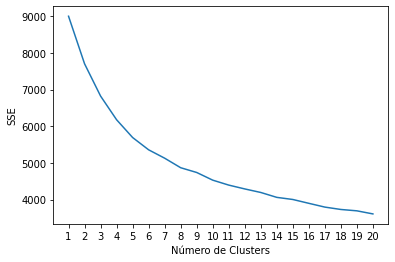

In [ ]:
class kmeans():
    def __init__(self, df2):
        self.df2 = df2
        
    def pre_processing(self):
        X = self.df2.drop(col_categoria, axis=1).values
        scaler = StandardScaler()
        self.X_scaled = scaler.fit_transform(X)
        return self
        
    def fit_pred(self):
        kmeans_kwargs = {"init": "random",
                        "n_init": 10,
                        "max_iter": 100,
                        "random_state": 2,}
        sse = []
        for k in range(1, 21):
            kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
            kmeans.fit(self.X_scaled)
            sse.append(kmeans.inertia_)
        sns.lineplot(x=range(1, 21), y=sse, markers=True)
        plt.xticks(range(1, 21))
        plt.xlabel("Número de Clusters")
        plt.ylabel("SSE")
        plt.show()

#         pred = clf.predict(self.X_test)
#         print(pred)

model = kmeans(df2).pre_processing()
model.fit_pred()